#### Overview


- The code implements the Q-learning algorithm to train an agent to play the **CartPole-v0 game**. 
- It discretizes the continuous state space and uses a Q-table to learn the optimal action-value function. 
- The agent iteratively explores the environment, updating the Q-table based on rewards and the maximum expected future rewards. 
- The training process is repeated for a specified number of episodes. After training, the agent is evaluated by selecting actions based on the learned Q-table. 
- The average score over the evaluation episodes is calculated and displayed. 

In [1]:
# Install necessary packages for virtual display
!apt-get install x11-utils > /dev/null 2>&1 
!pip install pyglet > /dev/null 2>&1 
!apt-get install -y xvfb python-opengl > /dev/null 2>&1
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!pip install gym

In [15]:
import numpy as np
import gym
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay

# Import the Display class from pyvirtualdisplay library
from pyvirtualdisplay import Display

%matplotlib inline

In [16]:


# Create a virtual display with specified visibility and size
display = Display(visible=0, size=(400, 300))

# Start the virtual display
display.start()


/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for

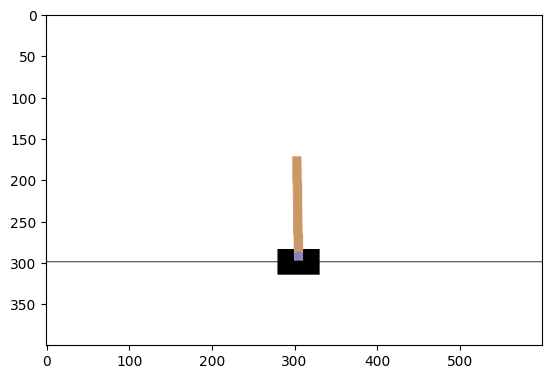

In [17]:
# Create the environment for the CartPole-v0 game
env = gym.make("CartPole-v0")

# Reset the environment to get the initial state
env.reset()

# Get the screen image of the environment
prev_screen = env.render(mode='rgb_array')

# Display the screen image using Matplotlib
plt.imshow(prev_screen)


### Run the Below cell to see real time learning 

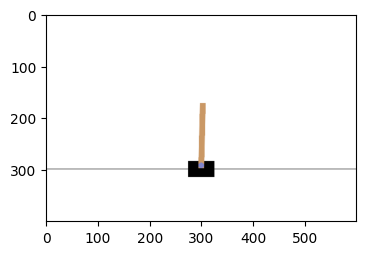

In [ ]:
# Function to discretize the state space
def discretize_state(state, state_bins):
    return tuple(np.digitize(s, bins) for s, bins in zip(state, state_bins))

# Start the virtual display
Display().start()

# Initialize the environment
env = gym.make('CartPole-v0')

# Define the bins for discretizing the state space
state_bins = [
    np.linspace(-4.8, 4.8, 24),
    np.linspace(-4, 4, 24),
    np.linspace(-0.418, 0.418, 48),
    np.linspace(-4, 4, 48)
]

# Create the Q-table with all zeros
q_table = np.zeros((25, 25, 49, 49, env.action_space.n))

# Set the learning parameters
alpha = 0.1
gamma = 0.99
epsilon = 1.0
epsilon_min = 0.01
epsilon_decay = 0.995
episodes = 500

# Set up the plotting
%matplotlib inline
plt.figure(figsize=(4, 3))

# Run the Q-learning algorithm for the specified number of episodes
for episode in range(1, episodes + 1):
    state = env.reset()
    state = discretize_state(state, state_bins)
    done = False
    
    while not done:
        # Render the environment
        img = plt.imshow(env.render(mode='rgb_array'))
        display.display(plt.gcf())
        display.clear_output(wait=True)
        
        # Choose an action based on epsilon-greedy strategy
        if np.random.random() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state])
        
        # Perform the chosen action and observe the next state and reward
        next_state, reward, done, _ = env.step(action)
        next_state = discretize_state(next_state, state_bins)

        # Update the Q-table using the Q-learning update rule
        q_table[state][action] += alpha * (reward + gamma * np.max(q_table[next_state]) - q_table[state][action])
        state = next_state

    # Decay the exploration rate epsilon
    epsilon = max(epsilon_min, epsilon * epsilon_decay)

# Close the environment
env.close()


In [18]:
# Function to discretize the state space
def discretize_state(state, state_bins):
    return tuple(np.digitize(s, bins) for s, bins in zip(state, state_bins))

# Create the CartPole-v0 environment
env = gym.make('CartPole-v0')

# Define the bins for discretizing the state space
state_bins = [
    np.linspace(-4.8, 4.8, 24),
    np.linspace(-4, 4, 24),
    np.linspace(-0.418, 0.418, 48),
    np.linspace(-4, 4, 48)
]

# Create the Q-table with all zeros
q_table = np.zeros((25, 25, 49, 49, env.action_space.n))

# Set the learning parameters
alpha = 0.1
gamma = 0.99
epsilon = 1.0
epsilon_min = 0.01
epsilon_decay = 0.995
episodes = 5000
evaluation_episodes = 100

# Train the agent using Q-learning
for episode in range(1, episodes + 1):
    state = env.reset()
    state = discretize_state(state, state_bins)
    done = False
    
    while not done:
        # Explore or exploit: choose an action based on epsilon-greedy strategy
        if np.random.random() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state])
        
        # Take the chosen action and observe the next state and reward
        next_state, reward, done, _ = env.step(action)
        next_state = discretize_state(next_state, state_bins)

        # Update the Q-table using the Q-learning update rule
        q_table[state][action] += alpha * (reward + gamma * np.max(q_table[next_state]) - q_table[state][action])
        state = next_state

    # Decay the exploration rate epsilon
    epsilon = max(epsilon_min, epsilon * epsilon_decay)

# Evaluate the trained agent
total_scores = []
for episode in range(1, evaluation_episodes + 1):
    state = env.reset()
    state = discretize_state(state, state_bins)
    done = False
    score = 0
    
    while not done:
        # Choose the best action based on the Q-table
        action = np.argmax(q_table[state])
        next_state, reward, done, _ = env.step(action)
        next_state = discretize_state(next_state, state_bins)
        state = next_state
        score += 1

    total_scores.append(score)

average_score = np.mean(total_scores)
print(f"Average Score over {evaluation_episodes} evaluation episodes: {average_score}")

# Close the environment
env.close()


Average Score over 100 evaluation episodes: 68.24


In [19]:
average_score = np.mean(total_scores)
median_score = np.median(total_scores)
std_deviation = np.std(total_scores)

print(f"Average Score over {evaluation_episodes} evaluation episodes: {average_score}")
print(f"Median Score over {evaluation_episodes} evaluation episodes: {median_score}")
print(f"Standard Deviation of Scores: {std_deviation}")


Average Score over 100 evaluation episodes: 68.24
Median Score over 100 evaluation episodes: 69.0
Standard Deviation of Scores: 11.172394550856142


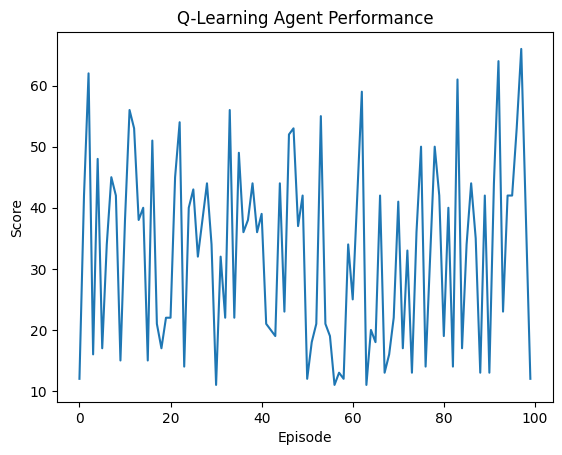

In [13]:

# Plot the evaluation scores
plt.plot(total_scores)
plt.xlabel('Episode')
plt.ylabel('Score')
plt.title('Q-Learning Agent Performance')
plt.show()

env.close()

#### Conclusion

Based on the evaluation of the agent over 100 episodes, the average score achieved was 68.24. This indicates that, on average, the agent was able to maintain the balance of the CartPole for a considerable duration during each episode.